In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install keras

In [3]:
#!pip install tensorflow

In [4]:
data = pd.read_csv("M0152_2564_SSF.csv",parse_dates=['nav_date']) 

#1."M0017_2565_SSF.csv"

#2. M0110_2564_SSF.csv

#3. "M0005_2558_SSF.csv"

#4. M0120_2564_SSF.csv

#5.M0134_2564_SSF.csv

#6."M0144_2563_SSF.csv"

#7.M0151_2563_SSF.csv M0152_2564_SSF.csv

In [5]:
data.tail(20)

,nav_date,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
306,2022-12-01,214940.31,4.0795,4.0796,4.0795,4.0795,4.0796
307,2022-12-02,236951.44,4.0970,4.0971,4.0970,4.0970,4.0971
308,2022-12-06,220894.66,3.8361,3.8362,3.8361,3.8361,3.8362
309,2022-12-07,219256.75,3.8076,3.8077,3.8076,3.8076,3.8077
310,2022-12-08,236170.73,3.8691,3.8692,3.8691,3.8691,3.8692
311,2022-12-09,251308.15,3.8406,3.8407,3.8406,3.8406,3.8407
312,2022-12-13,267320.13,3.9215,3.9216,3.9215,3.9215,3.9216
313,2022-12-14,266747.00,3.9073,3.9074,3.9073,3.9073,3.9074
314,2022-12-15,255782.50,3.7444,3.7445,3.7444,3.7444,3.7445
315,2022-12-16,252613.89,3.6980,3.6981,3.6980,3.6980,3.6981


In [6]:
data.describe()

,net_asset,last_val,sell_price,buy_price,sell_swap_price,buy_swap_price
count,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000
mean,1.471583e+07,6.123408,5.721661,5.681277,5.681277,5.721661
std,1.374966e+07,2.281784,2.638776,2.603289,2.603289,2.638776
min,0.000000e+00,3.529400,0.000000,0.000000,0.000000,0.000000
25%,5.740195e+04,4.193275,4.082075,4.081975,4.081975,4.082075
50%,1.605153e+07,5.136350,4.939400,4.922500,4.922500,4.939400
75%,2.931364e+07,8.008000,7.553675,7.478800,7.478800,7.553675
max,3.543128e+07,10.504000,10.609100,10.504000,10.504000,10.609100


In [7]:
data.isnull().sum()

nav_date           0
net_asset          0
last_val           0
sell_price         0
buy_price          0
sell_swap_price    0
buy_swap_price     0
dtype: int64

In [8]:
data['nav_date'] = pd.to_datetime(data['nav_date'])

In [9]:
data_day = data["nav_date"].dt.day
data_month = data["nav_date"].dt.month
data_year = data["nav_date"].dt.year


In [10]:
data_yearly = data.resample('Y', on='nav_date').mean()
data_day = data.resample('D', on='nav_date').mean()
data_month = data.resample('M', on='nav_date').mean()


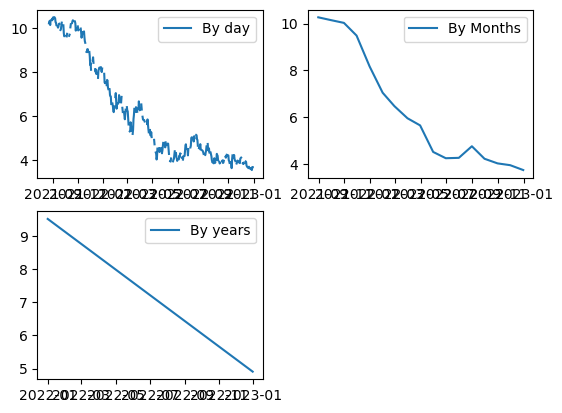

In [11]:
plt.subplot(221)
plt.plot(data_day.last_val, '-', label='By day')
plt.legend()


plt.subplot(222)
plt.plot(data_month.last_val, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(data_yearly.last_val, '-', label='By years')
plt.legend()



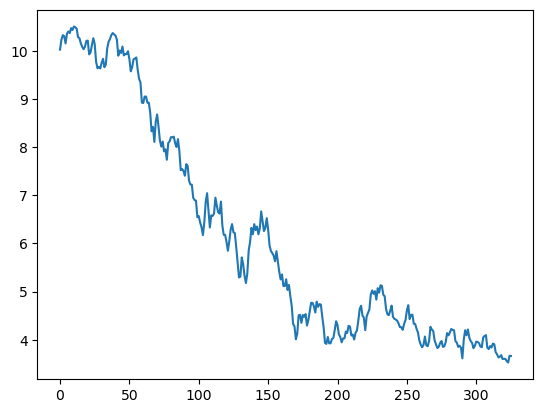

In [12]:
df = data.iloc[:,2:3].values
plt.plot(df)


In [13]:
df.shape

(326, 1)

In [14]:
df

array([[10.0237],
       [10.2287],
       [10.3242],
       [10.3028],
       [10.1525],
       [10.3517],
       [10.4003],
       [10.3685],
       [10.4694],
       [10.4311],
       [10.504 ],
       [10.4874],
       [10.4592],
       [10.2794],
       [10.2623],
       [10.1525],
       [10.0807],
       [10.0318],
       [10.086 ],
       [10.2047],
       [10.2107],
       [ 9.9252],
       [ 9.9639],
       [10.1204],
       [10.2609],
       [10.1385],
       [ 9.7754],
       [ 9.6362],
       [ 9.665 ],
       [ 9.633 ],
       [ 9.7501],
       [ 9.8328],
       [ 9.6594],
       [ 9.7105],
       [10.0453],
       [10.1867],
       [10.2428],
       [10.3273],
       [10.3683],
       [10.3418],
       [10.3125],
       [10.2302],
       [ 9.897 ],
       [10.0041],
       [ 9.9548],
       [10.0889],
       [ 9.9044],
       [ 9.93  ],
       [ 9.9317],
       [ 9.9903],
       [ 9.8282],
       [ 9.5732],
       [ 9.6599],
       [ 9.8234],
       [ 9.8397],
       [ 9

In [15]:
df = df.reshape(-1,1)

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))
dfnew = scaler.fit_transform(df)
dfnew

array([[0.93113584],
       [0.9605282 ],
       [0.97422074],
       [0.97115247],
       [0.94960284],
       [0.97816362],
       [0.98513176],
       [0.98057236],
       [0.99503914],
       [0.98954779],
       [1.        ],
       [0.99761994],
       [0.99357669],
       [0.96779744],
       [0.96534568],
       [0.94960284],
       [0.93930835],
       [0.93229719],
       [0.94006825],
       [0.95708714],
       [0.95794741],
       [0.91701316],
       [0.92256187],
       [0.94500043],
       [0.96514495],
       [0.94759556],
       [0.89553523],
       [0.87557709],
       [0.87970636],
       [0.87511829],
       [0.89190778],
       [0.90376509],
       [0.87890345],
       [0.88623003],
       [0.93423279],
       [0.95450635],
       [0.96254982],
       [0.97466521],
       [0.98054369],
       [0.97674419],
       [0.97254323],
       [0.96074327],
       [0.91296992],
       [0.92832564],
       [0.92125713],
       [0.94048404],
       [0.91403091],
       [0.917

In [17]:
train_size = int(len(dfnew)-60)
test_size = len(dfnew) - train_size
train = dfnew[0:train_size,:]
test = dfnew[train_size:len(dfnew),:]
print("train size: {} , test size: {}".format(len(train),len(test)))

train size: 266 , test size: 60


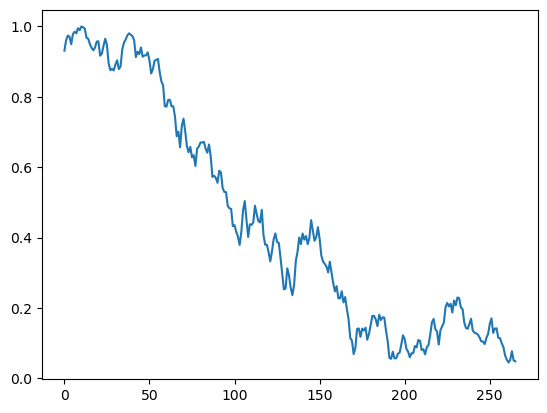

In [18]:
plt.plot(train)

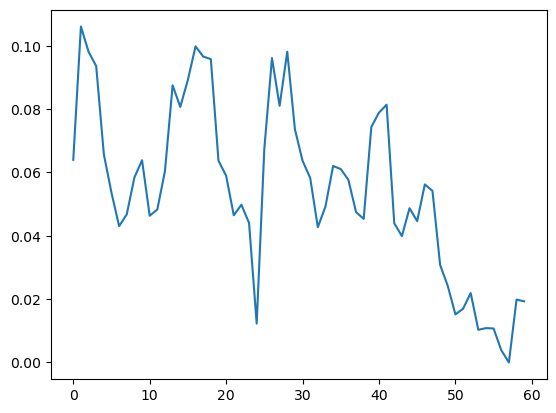

In [19]:
plt.plot(test)

In [20]:
nums = 3

In [21]:
len(dfnew)

326

In [22]:
X_train = []
y_train = []
for i in range(nums,train_size):
    X_train.append(train[i-nums:i,0])
    y_train.append(train[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [23]:
print(X_train.shape)
print(y_train.shape)

(263, 3)
(263,)


In [24]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [25]:
X_train.shape

(263, 3, 1)

In [26]:
train.shape

(266, 1)

In [27]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [28]:
#hyperparameter juning

In [29]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(
    seed_value 
)

In [30]:
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences=True,input_shape = (X_train.shape[1],1),seed = 42))
regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 100,return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 100,return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))


In [31]:
regressor.compile(optimizer = 'adam',loss = "mean_squared_error")
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
9/9 [==============================] - 4s 7ms/step - loss: 0.2133
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0332
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 8/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 10/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 11/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 12/20
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 13/20
9/9 [==============================] - 0s 6ms/step - loss: 0.

In [32]:
test.shape

(60, 1)

In [33]:
X_test = []
for i in range(nums,60):
    X_test.append(test[i-nums:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [34]:
X_test.shape

(57, 3, 1)

In [35]:
predicts = regressor.predict(X_test)
predicts = scaler.inverse_transform(predicts)

2/2 [==============================] - 1s 3ms/step


In [36]:
predicts.shape

(57, 1)

In [37]:
testnew = scaler.inverse_transform(test)

In [38]:
predicts.shape

(57, 1)

In [39]:
testnew.shape

(60, 1)

In [40]:
testnew_data = np.delete(testnew, range(nums), axis=0)

In [41]:
testnew_data.shape


(57, 1)

In [42]:
train2 = scaler.inverse_transform(train)
test2 = scaler.inverse_transform(test)

In [43]:
sumtrain = np.append(train2, test2)

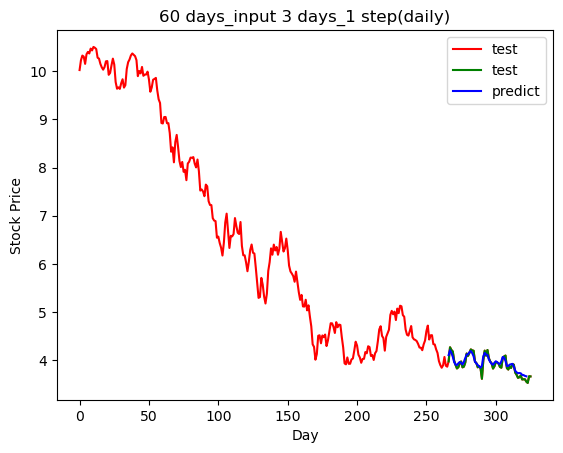

In [44]:
plt.plot(sumtrain,color = 'red',label="test")
plt.plot(range(train_size,train_size+test_size),testnew,color = 'green',label="test")
plt.plot(range(train_size,train_size+test_size-nums),predicts,color = 'blue',label = 'predict')
plt.title(str(test_size)+" days_input 3 days_1 step(daily)")
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()

In [45]:
MSE_error = mean_squared_error(testnew_data, predicts)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.023316987053580693


In [46]:
dfs = pd.DataFrame(predicts, columns=['predict'])

In [47]:
dfs

,predict
0,4.107218
1,4.208394
2,4.150958
3,4.073672
4,3.961807
5,3.910916
6,3.898777
7,3.936230
8,3.963429
9,3.947539


In [48]:
dfs['test'] = testnew_data 

In [49]:
dfs

,predict,test
0,4.107218,4.1821
1,4.208394,3.9880
2,4.150958,3.9032
3,4.073672,3.8296
4,3.961807,3.8556
5,3.910916,3.9368
6,3.898777,3.9748
7,3.936230,3.8525
8,3.963429,3.8664
9,3.947539,3.9512
